In [37]:
import numpy as np
#import matplotlib as plt
import scipy as sp
import pandas as pd
import seaborn as sns
import sklearn as skl
import statsmodels as sm
import matplotlib.pyplot as plt


In [38]:

# Say, "the default sans-serif font is COMIC SANS"
plt.rcParams['font.serif'] = "Garamond"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "serif"
#set default font size
plt.rcParams.update({'font.size': 22})

#set default figure size

plt.rcParams.update({'figure.figsize': (10, 7)})

#set default line width

plt.rcParams.update({'lines.linewidth': 2})

#set default line style

plt.rcParams.update({'lines.linestyle': '-'})




#set default grid style

plt.rcParams.update({'axes.grid': True, 'grid.color': 'b', 'grid.alpha': 0.5, 'grid.linestyle': '-.'})

#set default grid style

plt.rcParams.update({'axes.grid': True, 'grid.color': 'b', 'grid.alpha': 0.5, 'grid.linestyle': '-.'})

#set default axis line width



In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define base color
base_color = 'lightskyblue'

# Generate complementary colors
complementary_colors = []
for i in range(5):
    hue_shift = i * 50  # Increase hue in steps of 36 degrees
    base_rgb = mcolors.to_rgb(base_color)
    shifted_hue = (base_rgb[0] + hue_shift / 360) % 1.0  # Ensure hue stays within [0, 1)
    new_color = mcolors.hsv_to_rgb((shifted_hue, base_rgb[1], base_rgb[2]))
    complementary_colors.append(new_color)

# Update the color cycle in rcParams
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=complementary_colors)





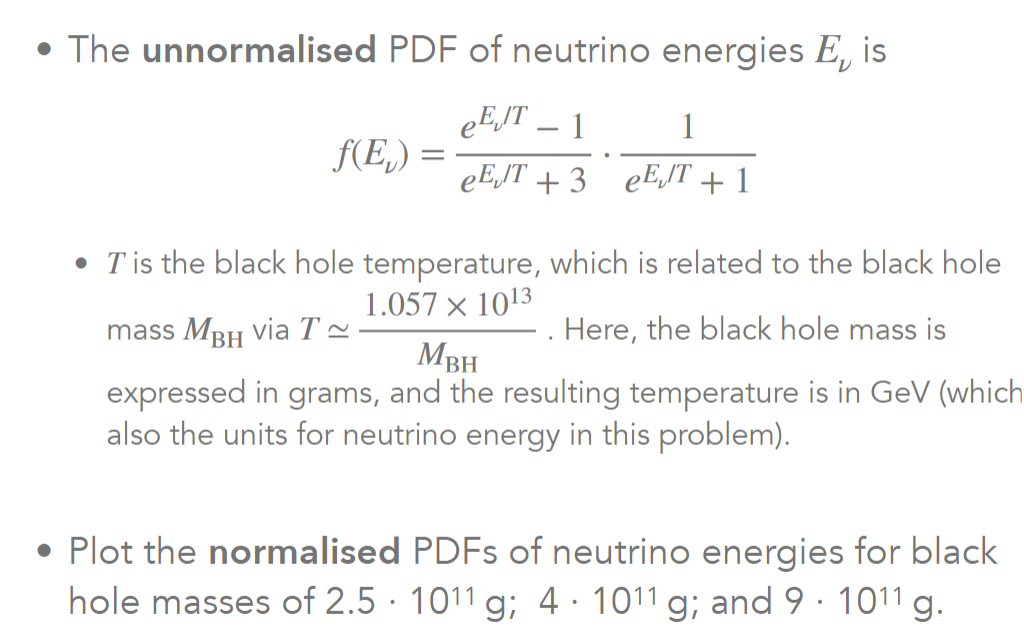

In [40]:
def Temp(M):
    T = 1.057*10**(13)/(M)
    return T
def f(E,M):
    T = Temp(M)
    y = ((np.exp(E/T)-1)/(np.exp(E/T)+3))*(1/(np.exp(E/T)+1))
    return y

    
mass = np.array([2.5,4,9])*(10**(11))

#integrate
from scipy.integrate import quad

def norm_f(E,M):
    #interate over the function
    result = quad(f, 0, 1000 , args=(M))
    normf = f(E,M)/result[0]
    return normf


    


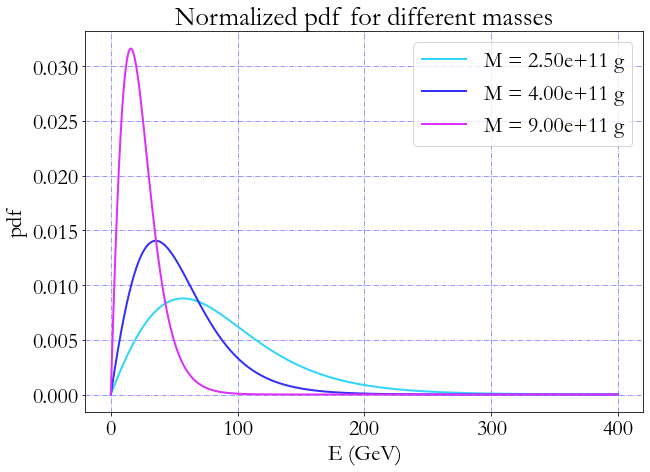

In [41]:
E = np.linspace(0,400,10000)
for i in range(0,len(mass)):
    plt.plot(E,norm_f(E,mass[i]),label = 'M = {:.2e} g'.format(mass[i]))
    plt.legend()
    plt.xlabel('E (GeV)')
    plt.ylabel('pdf')
    plt.title('Normalized pdf for different masses')







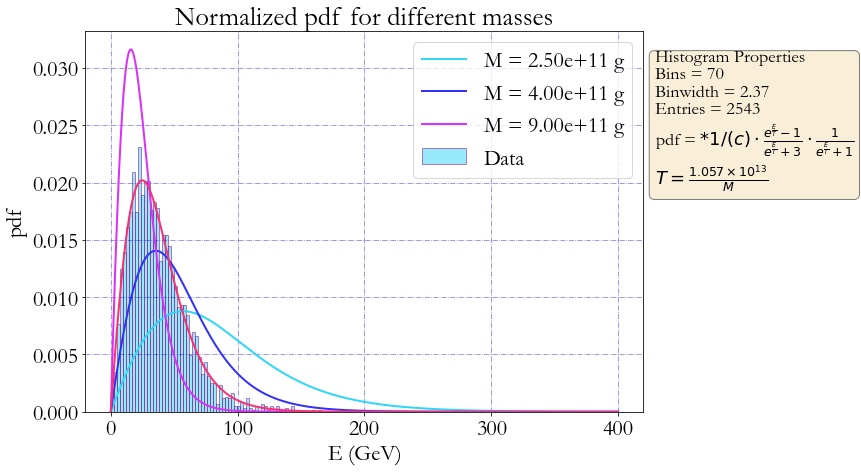

In [42]:
df = pd.read_csv('neutrino_energies.csv')
En = df['E_neutrino [GeV]']
bins =70

maxE = np.max(En)
minE = np.min(En)

counts, bins = np.histogram(En, range = (minE,maxE), bins = bins)


binwidth = bins[1]-bins[0]

counts_norm = counts/(np.sum(counts)*binwidth)



bin_centers = (bins[1:] +bins[:-1])/2

text_for_box = ('Histogram Properties\n'
                'Bins = {}\n'
                'Binwidth = {}\n'
                'Entries = {}\n'
                'pdf = $*1/(c)\\cdot\\frac{{e^{{\\frac{{E}}{{T}}}}-1}}{{e^{{\\frac{{E}}{{T}}}}+3}} \\cdot \\frac{{1}}{{e^{{\\frac{{E}}{{T}}}}+1}}$\n'
                '$T = \\frac{{1.057 \\times 10^{{13}}}}{{M}}$').format(len(bin_centers), round(binwidth, 2), len(En))

textboxprops = dict(boxstyle='round', facecolor='wheat', alpha=0.5)



plt.figure()



for i in range(0,len(mass)):
    plt.plot(E,norm_f(E,mass[i]),label = 'M = {:.2e} g'.format(mass[i]))
    plt.xlabel('E (GeV)')
    plt.ylabel('pdf')
    plt.title('Normalized pdf for different masses')
plt.plot(E, norm_f(E,5.75*10**11))
plt.text(1.02, 0.95, text_for_box, transform=plt.gca().transAxes, fontsize=18, verticalalignment='top', bbox=textboxprops)
plt.xlabel('E (GeV)')
plt.ylabel('pdf')
plt.bar(bin_centers,counts_norm, width = binwidth, label = 'Data', align='center', edgecolor='purple', alpha = 0.5)
plt.legend()
plt.show()



-1503006012.0240479


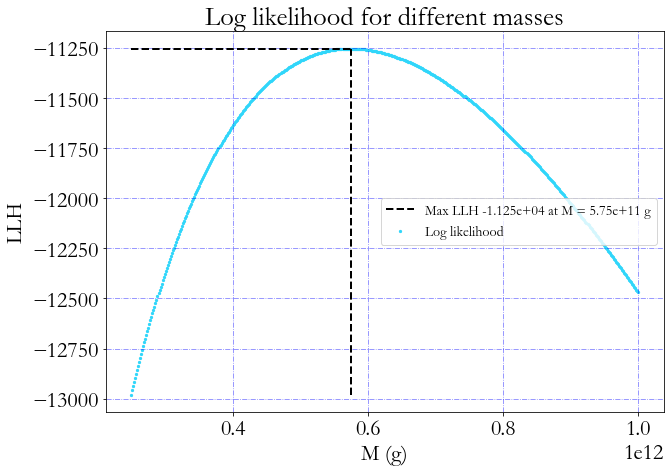

In [43]:
def LLH(E, M):
    #calculate the log likelihood
    llh =  np.sum(np.log(norm_f(E,M)))
    return llh
masses = np.linspace(2.5*10**(11),10**(12),500)
print(masses[0]-masses[1])

llh = np.zeros(len(masses))
for i in range(0,len(masses)):
    llh[i] = LLH(En,masses[i])


y_values  = np.ones(100)*np.max(llh)

mask = llh == np.max(llh)
best_mass = masses[mask]


x_values = np.linspace(2.5*10**(11), best_mass ,100)

x_val1 = np.ones(100)*best_mass
y_val1 = np.linspace(np.min(llh), np.max(llh),100)

mass_optimal = masses[mask]

plt.plot(x_val1,y_val1, linestyle = '--', color = 'black', label = None)
plt.plot(x_values,y_values, linestyle = '--', color = 'black', label = f'Max LLH {np.max(llh):.4} at M = {best_mass[0]:.2e} g')

plt.scatter(masses,llh, label = 'Log likelihood', s = 5)

plt.xlabel('M (g)')
plt.ylabel('LLH')
plt.title('Log likelihood for different masses')
plt.legend(loc = 'center right', fontsize = 14)











In [72]:
max_llh = np.max(llh)

# Find the index of the element closest to max_llh - 0.5
index_a = np.argmin(np.abs(llh - (max_llh - 0.5)))

mass_lower = masses[index_a]
print(mass_lower)
mask = masses > mass_optimal 
new_mass = masses[mask]
new_llh = llh[mask]
index_b = np.argmin(np.abs(new_llh - (np.max(llh) - 0.5)))
mass_upper = new_mass[index_b]
print(mass_upper)
high_sigma = mass_upper - mass_optimal

low_sigma = mass_optimal - mass_lower
print(high_sigma, low_sigma)


567134268537.0742
582164328657.3147
[7.51503006e+09] [7.51503006e+09]


In [44]:
llh[mask]-0.5
mask2 = llh == (llh[mask]-0.5)









In [45]:
Likely = [
LLH(En, 2.5*10**11),
LLH(En, 4*10**11),
LLH(En,5.75*10**11),
LLH(En, 9*10**11)]
likely = np.round(Likely,0)
print(likely)
mass = [2.5*10**11, 4*10**11, 5.75*10**11, 9*10**11]
print(mass)

[-12979. -11638. -11253. -12025.]
[250000000000.0, 400000000000, 575000000000.0, 900000000000]


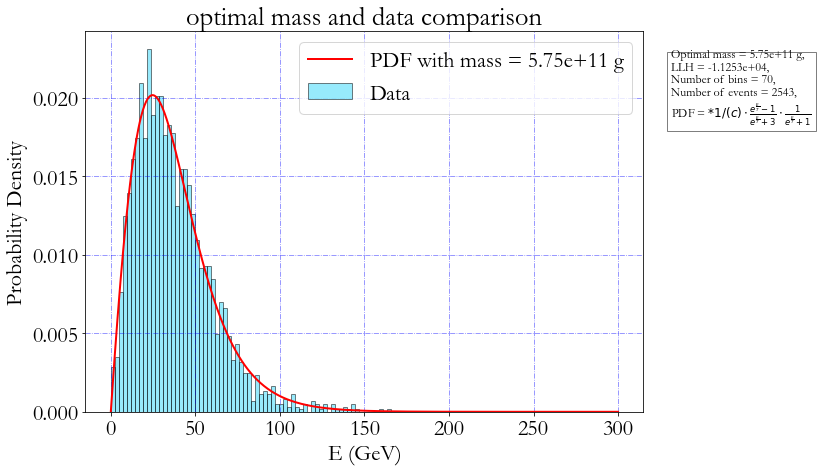

In [46]:
bins =70

maxE = np.max(En)
minE = np.min(En)

counts, bins = np.histogram(En, range = (minE,maxE), bins = bins)


binwidth = bins[1]-bins[0]

counts_norm = counts/(np.sum(counts)*binwidth)

bin_centers = (bins[1:] +bins[:-1])/2

plt.bar(bin_centers,counts_norm, width = binwidth, label = 'Data', align='center', edgecolor='black', alpha = 0.5)

energies = np.linspace(0,300,1000)

plt.plot(energies,norm_f(energies,mass_optimal), label = 'PDF with mass = {:.2e} g'.format(mass_optimal[0]), color = 'red')

plt.xlabel('E (GeV)')
plt.ylabel('Probability Density')
plt.title('optimal mass and data comparison')
plt.legend()


text = 'Optimal mass = {:.2e} g'.format(best_mass[0]) + ',\n' + \
       'LLH = {:.5}'.format(max(llh)) + ',\n' + \
       'Number of bins = {}'.format(len(counts)) + ',\n' + \
       'Number of events = {}'.format(len(En)) + ',\n' + \
       'PDF = $*1/(c)\\cdot\\frac{{e^{{\\frac{{E}}{{T}}}}-1}}{{e^{{\\frac{{E}}{{T}}}}+3}} \\cdot \\frac{{1}}{{e^{{\\frac{{E}}{{T}}}}+1}}$'

plt.annotate(text, xy=(1, 1), xycoords='axes fraction',
             xytext=(1.05, 0.85), textcoords='axes fraction',
             fontsize=12, ha='left', va='center',
             bbox=dict(facecolor='white', alpha=0.5))

plt.show()

Text(1.05, 0.85, 'Mass from fit = 5.71e+11 g,\nLLH = -1.2979e+04,\nNumber of bins = 70,\nNumber of events = 2543')

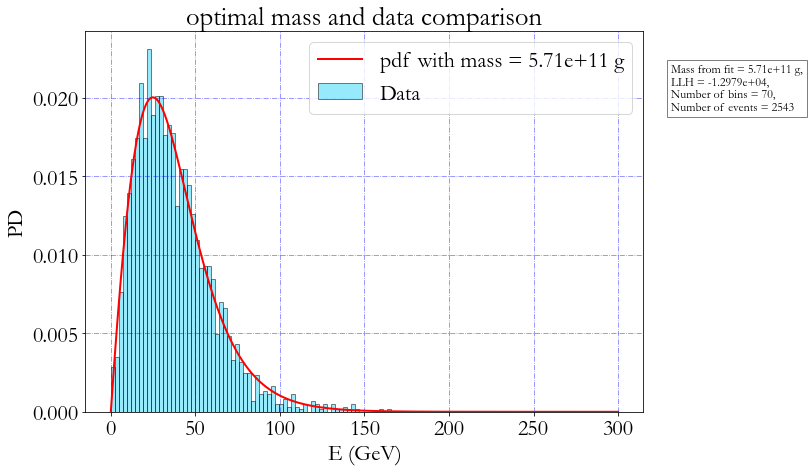

In [47]:
from scipy.optimize import minimize
En = np.array(df['E_neutrino [GeV]'])

def Temp(M):
    T = 1.057*10**(13)/(M)
    return T
def f(E,M):
    T = Temp(M)
    y = ((np.exp(E/T)-1)/(np.exp(E/T)+3))*(1/(np.exp(E/T)+1))
    return y


#integrate
from scipy.integrate import quad

def norm_f(E,M):
    #interate over the function
    result = quad(f, 0, 1000 , args=(M))
    normf = f(E,M)/result[0]
    return normf
x = bin_centers
y = counts_norm

def objective(M):
    #define the objective function
    return np.sum(abs(y-norm_f(x,M)))

#initial guess
M0 = 5*10**(11)

#optimize

sol = minimize(objective, M0, method = 'Nelder-Mead')

mass_fromfit = sol.x


bin_centers = (bins[1:] +bins[:-1])/2

plt.bar(bin_centers,counts_norm, width = binwidth, label = 'Data', align='center', edgecolor='black', alpha = 0.5)

energies = np.linspace(0,300,1000)

plt.plot(energies,norm_f(energies,mass_fromfit), label = 'pdf with mass = {:.2e} g'.format(mass_fromfit[0]), color = 'red')

plt.xlabel('E (GeV)')
plt.ylabel('PD')
plt.title('optimal mass and data comparison')
plt.legend()


text = 'Mass from fit = {:.2e} g'.format(mass_fromfit[0]) + ',\n' + \
       'LLH = {:.5}'.format(min(llh)) + ',\n' + \
       'Number of bins = {}'.format(len(counts)) + ',\n' + \
       'Number of events = {}'.format(len(En))

plt.annotate(text, xy=(1, 1), xycoords='axes fraction',
             xytext=(1.05, 0.85), textcoords='axes fraction',
             fontsize=12, ha='left', va='center',
             bbox=dict(facecolor='white', alpha=0.5))





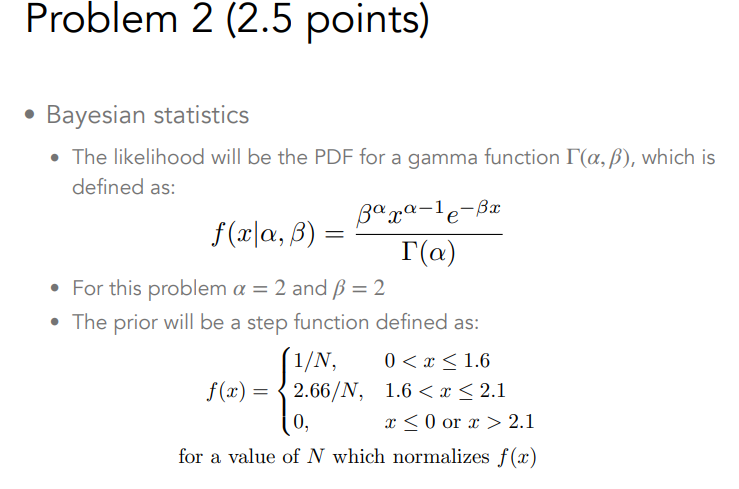

In [48]:
a = 2
b = 2
x = np.linspace(0, 4, 10000000)


def likelyhood(x,k):
    mask1 = (0 < x) & (x <= 1.6)
    mask2 = (1.6 < x) & (x <= 2.1)
    y = np.zeros(len(x))
    y[mask1] = 1 / k
    y[mask2] = 2.66 / k
    return y



def new_func(k):
    integrate = np.trapz(likelyhood(x,k),x)
    return np.abs(integrate - 1)


initial_guess = [1]

# Minimize new_func
result = minimize(new_func, initial_guess, method='Nelder-Mead')

# Extract optimized k
optimized_k = result.x

print("Optimized k:", optimized_k)













Optimized k: [2.92998047]


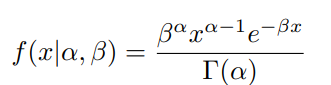

[0.50005001]


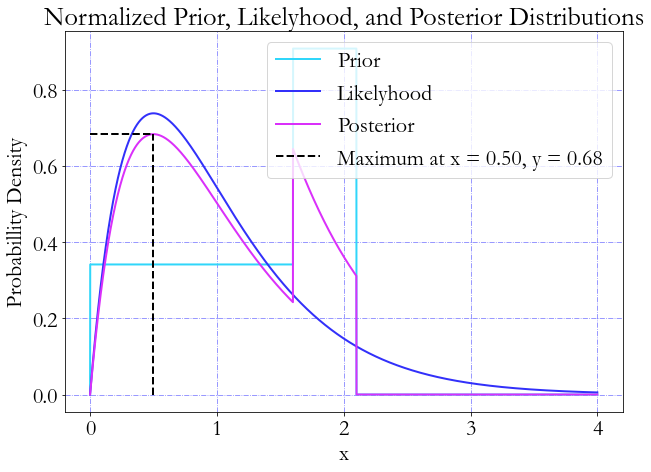

In [49]:
def normlized_prior(x):
    y = likelyhood(x,optimized_k)
    return y
def real_likely(x):
    y = b**a*x**(a-1)*np.exp(-b*x)/sp.special.gamma(a)
    return y
def norm_real_likely(x):
    y = real_likely(x)/np.trapz(real_likely(x),x)
    return y

def posterior(x):
    y = real_likely(x)*normlized_prior(x)
    return y

def norm_posterior(x):
    y = posterior(x)/np.trapz(posterior(x),x)
    return y

x_for_plot = np.linspace(0,4,10000)

plt.plot(x_for_plot,normlized_prior(x_for_plot), label = 'Prior')
plt.plot(x_for_plot,norm_real_likely(x_for_plot), label = 'Likelyhood')
plt.plot(x_for_plot,norm_posterior(x_for_plot), label = 'Posterior')


mask = norm_posterior(x_for_plot) == np.max(norm_posterior(x_for_plot))
y_max = np.max(norm_posterior(x_for_plot))
x_max = x_for_plot[mask] 
x_values = np.linspace(0, x_max, 100)
y_values = np.ones(100)*y_max

x_val1 = np.ones(100)*x_max

y_val1 = np.linspace(0, y_max, 100)

plt.plot(x_val1, y_val1, linestyle='--', color='black', label=f'Maximum at x = {x_max[0]:.2f}, y = {y_max:.2f}')

print(x_max)
plt.plot(x_values, y_values, linestyle='--', color='black', label=None)

plt.legend()

plt.title('Normalized Prior, Likelyhood, and Posterior Distributions')
plt.xlabel('x')
plt.ylabel('Probabillity Density')

plt.show()



excercise 3

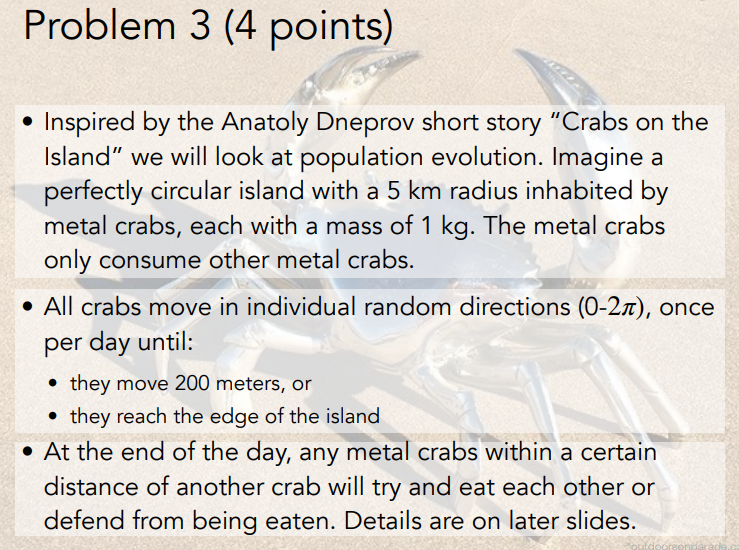

In [74]:
def cirle(x,y):
    r = np.sqrt(x**2 + y**2)
    return r

mass_crab = 1

radius =  5

theta = np.linspace(0,2*np.pi,1000)

starting_point = np.array([3.6,-2])

increment = 0.2


x_pos = [starting_point[0]]
y_pos = [starting_point[1]]



def new_position(x,y,increment):

        theta = np.random.uniform(0,2*np.pi)
        x_new = x + increment*np.cos(theta)
        y_new = y + increment*np.sin(theta)
        a  = y_new/x_new

        if cirle(x_new,y_new) > 5:
            if x_new > 0:
                x_new = 5/(np.sqrt(1+(a)**2))
                y_new = (a)*x_new
            if x_new < 0:
                x_new = -5/(np.sqrt(1+(a)**2))
                y_new = (a)*x_new
            if x_new == 0 and y_new > 0:
                x_new = 0
                y_new = 5
            if x_new == 0 and y_new < 0:
                x_new = 0
                y_new = -5
            if y_new == 0 and x_new > 0:
                x_new = 5
                y_new = 0
            if y_new == 0 and x_new < 0:
                x_new = -5
                y_new = 0

        
        x_pos.append(x_new)
        y_pos.append(y_new)


for i in range(0,200):
    new_position(x_pos[-1],y_pos[-1],increment)

   


In [75]:


def distance(x0, y0, increment):
    distance = []
    alpha = True
    x = x0
    y = y0
    
    while alpha == True:
        theta = np.random.uniform(0, 2*np.pi)
        x = x + increment*np.cos(theta)
        y = y + increment*np.sin(theta)
        a = y/x
        
        if cirle(x, y) > 5:
            r1 = np.sqrt(x**2 + y**2)
            if x > 0:
                x = 5/(np.sqrt(1+(a)**2))
                y = (a)*x
            if x < 0:
                x = -5/(np.sqrt(1+(a)**2))
                y = (a)*x
            if x == 0 and y > 0:
                x = 0
                y = 5
            if x == 0 and y < 0:
                x = 0
                y = -5
            if y == 0 and x > 0:
                x = 5
                y = 0
            if y == 0 and x < 0:
                x = -5
                y = 0
            r2 = np.sqrt(x**2 + y**2)
            distance.append(r2-r1)
            alpha = False     
        distance.append(increment)
    return np.sum(distance)

dist = []
for i in range(0,501):
    dist.append(distance(starting_point[0], starting_point[1], increment))


Text(0.5, 1.0, 'Total distance traveled by the crab before reaching the edge of the circle')

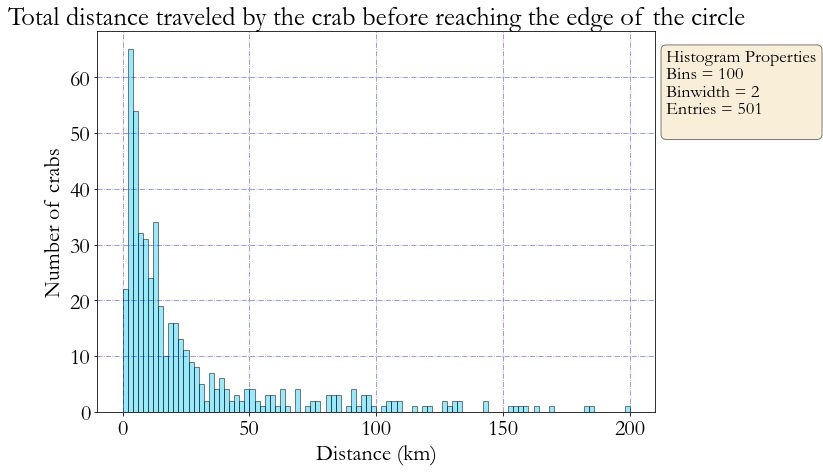

In [52]:
xmin = 0 
xmax = 200
bin_width = 2
N_bins = int((xmax-xmin)/bin_width)
counts, bins = np.histogram(dist, range = (xmin,xmax), bins = N_bins)
bin_centers = (bins[1:] +bins[:-1])/2


text_for_box = ('Histogram Properties\n'
                'Bins = {}\n'
                'Binwidth = {}\n'
                'Entries = {}\n').format(len(bin_centers), round(bin_width, 2), len(dist))

textboxprops = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


plt.text(1.02, 0.95, text_for_box, transform=plt.gca().transAxes, fontsize=18, verticalalignment='top', bbox=textboxprops)

plt.bar(bin_centers, counts, width = bin_width, label = 'Data', align = 'center', edgecolor = 'black', alpha = 0.5)
plt.xlabel('Distance (km)')
plt.ylabel('Number of crabs')
plt.title('Total distance traveled by the crab before reaching the edge of the circle')


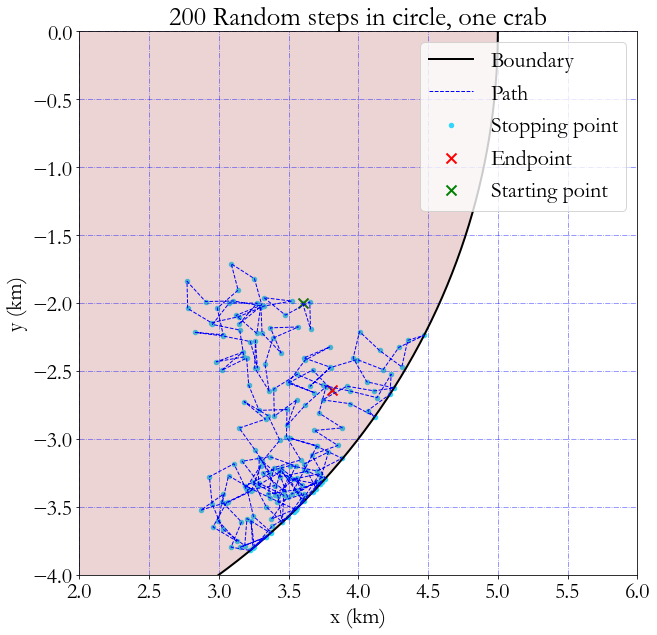

In [58]:
plt.figure(figsize=(10, 10))
plt.title('200 Random steps in circle, one crab')

x_circle = np.cos(theta)*radius
y_circle = radius*np.sin(theta)





# Fill the entire plot area with blue
#plt.fill_between([-6, 6], -6, 6, color='blue')

# Fill the area inside the circle with brown
plt.fill(x_circle, y_circle, color='brown', alpha=0.2)

# Plot the boundary of the circle
plt.plot(x_circle, y_circle, label='Boundary', color='black')

plt.plot(x_pos, y_pos, label='Path', color='blue', linestyle='--', linewidth=1 )
# Plot the random walk path
plt.scatter(x_pos, y_pos, label='Stopping point', s=20)
plt.scatter(x_pos[-1], y_pos[-1], label='Endpoint', s=100, color = 'red', marker = 'x')
plt.scatter(starting_point[0], starting_point[1], label='Starting point', s=100, color = 'green', marker = 'x')

plt.legend(loc  = 'upper right')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.xlim(2,6)
plt.ylim(-4,0)
plt.show()

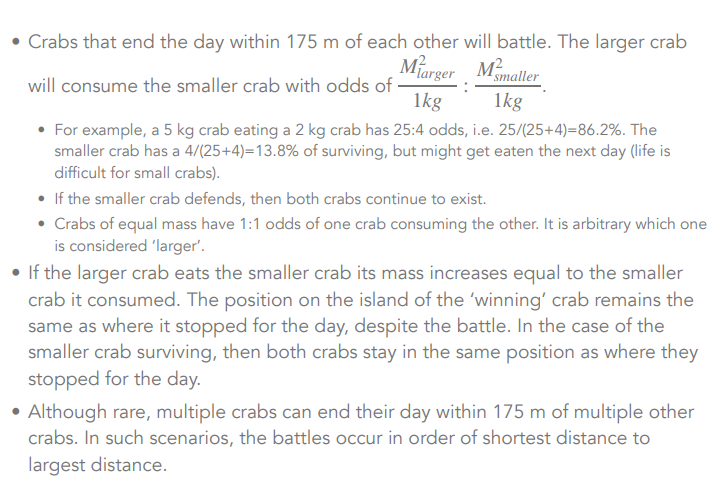

In [ ]:



np.random.randint(1000000,5000000)

2897712

In [76]:


def dist(x,y, threshhold):
    x = np.array(x)
    y = np.array(y)
    dist = []
    ij = []

    
    for i in range(len(x)):
        for j in range(i+1, len(x)):
                dis = np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
                
                dist.append(dis)
                ij.append([i,j])
    ij = np.array(ij)
    sorted_index = np.argsort(dist)
    dist = np.sort(dist)
    sorted_ij = ij[sorted_index]
    mask = dist < threshhold
    dist = dist[mask]
    sorted_ij = sorted_ij[mask]
    return sorted_ij

def prob_eat(m1,m2):

    p1 = m1/(m1+m2)
    p2 = m2/(m1+m2)
    u = np.random.uniform(0,1)
    if m1 > m2:
        p = p1
        if u < p:
            return 1
    else: 
        p = p2
        if u < p:
            return 2


def eating(x, y, mass, threshold):
    x = np.array(x)
    y = np.array(y)
    mass = np.array(mass)
    index = dist(x,y,threshold)

    for i in range(len(index)):
        ix = index[i][0]
        jx = index[i][1]
        if prob_eat(mass[ix], mass[jx]) == 1:
            mass[ix] = mass[ix] + mass[jx]
            mass[jx] = 0

            x[jx] = np.random.randint(1000000,5000000)
            y[jx] =  np.random.randint(1000000,5000000)

        if prob_eat(mass[ix], mass[jx]) == 2:
            mass[jx] += mass[ix] 
            mass[ix] = 0
            x[ix] = np.random.randint(1000000,5000000)
            y[ix] =  np.random.randint(1000000,5000000)
        
                      
    return x, y, mass
     
def new_position(x,y,increment):

        theta = np.random.uniform(0,2*np.pi)
        x_new = x + increment*np.cos(theta)
        y_new = y + increment*np.sin(theta)
        a  = y_new/x_new

        if cirle(x_new,y_new) > 5:
            if x_new > 0:
                x_new = 5/(np.sqrt(1+(a)**2))
                y_new = (a)*x_new
            if x_new < 0:
                x_new = -5/(np.sqrt(1+(a)**2))
                y_new = (a)*x_new
            if x_new == 0 and y_new > 0:
                x_new = 0
                y_new = 5
            if x_new == 0 and y_new < 0:
                x_new = 0
                y_new = -5
            if y_new == 0 and x_new > 0:
                x_new = 5
                y_new = 0
            if y_new == 0 and x_new < 0:
                x_new = -5
                y_new = 0
        return x_new, y_new


In [ ]:
num_crabs = []
m = []
for k in range(500):
    df = pd.read_csv('CrabStartPositions.txt', header= None ,delimiter=' ')
    x_data = np.array(df[0])
    y_data = np.array(df[1])
    mass_data = np.ones(len(x_data))
    threshold = 0.175
    
    for i in range(0,200):
        x_data, y_data, mass_data = eating(x_data, y_data, mass_data, threshold)
        
        for j in range(len(x_data)):
            x_data[j], y_data[j] = new_position(x_data[j],y_data[j],increment)
    
    mask = mass_data > 0.5
    num_crabs.append(len(mass_data[mask]))
    m.append(np.max(mass_data))
    print(k)
  
    

        
  
    
  
    

<ipython-input-18-79d70e392000>:25: RuntimeWarning: invalid value encountered in double_scalars
  p1 = m1/(m1+m2)
<ipython-input-18-79d70e392000>:26: RuntimeWarning: invalid value encountered in double_scalars
  p2 = m2/(m1+m2)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


KeyboardInterrupt: 

9.0

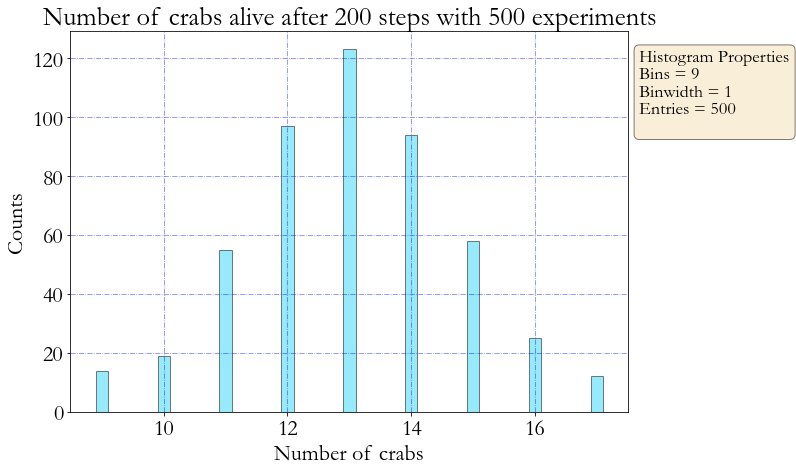

In [ ]:
x_max = np.max(num_crabs)-0.5
x_min = np.min(num_crabs)+0.5
bin_width = 1
N_bins = int((x_max-x_min)/bin_width)
counts, bins = np.histogram(num_crabs, range = (x_min,x_max), bins = N_bins)
bin_centers = (bins[1:] +bins[:-1])/2
plt.bar(bin_centers, counts, width = bin_width/5, label = 'Data', align = 'center', edgecolor = 'black', alpha = 0.5)

text_for_box = ('Histogram Properties\n' 
                'Bins = {}\n'
                'Binwidth = {}\n'
                'Entries = {}\n').format(len(bin_centers), round(bin_width, 2), len(num_crabs))

textboxprops = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(1.02, 0.95, text_for_box, transform=plt.gca().transAxes, fontsize=18, verticalalignment='top', bbox=textboxprops)

plt.xlabel('Number of crabs')
plt.ylabel('Counts')
plt.title('Number of crabs alive after 200 steps with 500 experiments')
plt.show()

7


Text(0.5, 1.0, 'Mass of the largest crab after 200 steps with 500 experiments')

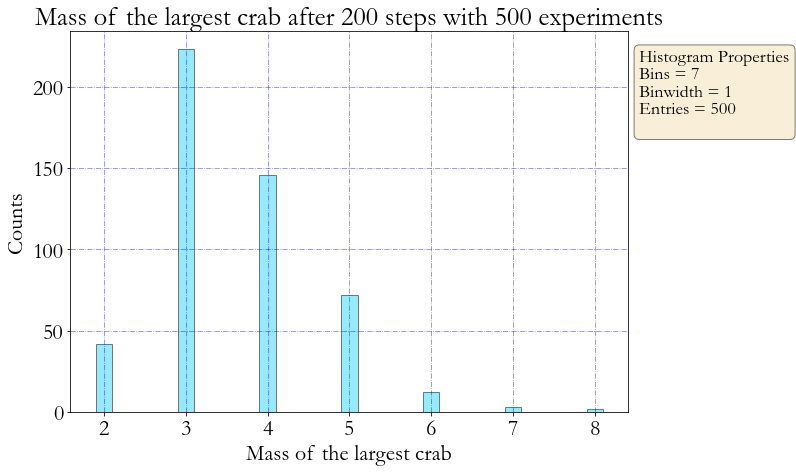

In [ ]:
xmin = np.min(m)-0.5
xmax = np.max(m)+0.5
bin_width = 1
N_bins = int((xmax-xmin))
print(N_bins)
counts, bins = np.histogram(m, range = (xmin,xmax), bins = N_bins)

bin_centers = (bins[1:] +bins[:-1])/2

plt.bar(bin_centers, counts, width = bin_width/5, label = 'Data', align = 'center', edgecolor = 'black', alpha = 0.5)

text_for_box = ('Histogram Properties\n'
                'Bins = {}\n'
                'Binwidth = {}\n'
                'Entries = {}\n').format(len(bin_centers), round(bin_width, 2), len(m))

textboxprops = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(1.02, 0.95, text_for_box, transform=plt.gca().transAxes, fontsize=18, verticalalignment='top', bbox=textboxprops)

plt.xlabel('Mass of the largest crab')
plt.ylabel('Counts')
plt.title('Mass of the largest crab after 200 steps with 500 experiments')

In [77]:
num_crabs = []
m = []
d = []
for k in range(500):
    df = pd.read_csv('CrabStartPositions.txt', header= None ,delimiter=' ')
    x_data = np.array(df[0])
    y_data = np.array(df[1])
    mass_data = np.ones(len(x_data))
    threshold = 0.175
    
    number = 20
    days = 0

    while number > 10:
        days += 1
        x_data, y_data, mass_data = eating(x_data, y_data, mass_data, threshold)
        mask1 = mass_data > 0.5
        number = len(mass_data[mask1])
        for j in range(len(x_data)):
            x_data[j], y_data[j] = new_position(x_data[j],y_data[j],increment)
    d.append(days)      
    
    mask = mass_data > 0.5
    num_crabs.append(len(mass_data[mask]))
    m.append(np.max(mass_data))
    print(k)

<ipython-input-76-79d70e392000>:25: RuntimeWarning: invalid value encountered in double_scalars
  p1 = m1/(m1+m2)
<ipython-input-76-79d70e392000>:26: RuntimeWarning: invalid value encountered in double_scalars
  p2 = m2/(m1+m2)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

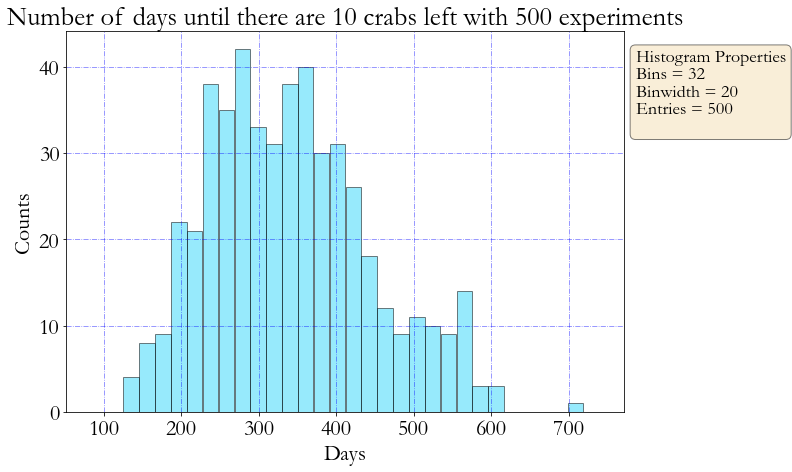

In [83]:
x_max = np.max(d)-0.5
x_min = np.min(d)+0.5
bin_width = 20
N_bins = int((x_max-x_min)/bin_width)
counts, bins = np.histogram(d, range = (x_min,x_max), bins = N_bins)
bin_centers = (bins[1:] +bins[:-1])/2

plt.bar(bin_centers, counts, width = bin_width, label = 'Data', align = 'center', edgecolor = 'black', alpha = 0.5)

text_for_box = ('Histogram Properties\n'
                'Bins = {}\n'
                'Binwidth = {}\n'
                'Entries = {}\n').format(len(bin_centers), round(bin_width, 2), len(d))

textboxprops = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(1.02, 0.95, text_for_box, transform=plt.gca().transAxes, fontsize=18, verticalalignment='top', bbox=textboxprops)

plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Number of days until there are 10 crabs left with 500 experiments')

plt.show()

In [96]:
np.cumsum(counts*bin_width)/np.sum(counts*bin_width)

(bin_centers[7]-bin_centers[8])/2
    
    

-10.234375

In [ ]:
d/np.sum(d)

array([0.00248998, 0.00358314, 0.00219847, 0.00222884, 0.00202235,
       0.00114175, 0.00243532, 0.00284829, 0.00143933, 0.00247783,
       0.00125106, 0.00262359, 0.00310336, 0.00308515, 0.00168833,
       0.00262359, 0.00276327, 0.00208308, 0.0021013 , 0.00182801,
       0.0021924 , 0.002824  , 0.00075914, 0.00213167, 0.00240496,
       0.00202235, 0.00185837, 0.00163974, 0.00142111, 0.00136038,
       0.00269039, 0.00210737, 0.00143326, 0.00191911, 0.00199198,
       0.00114175, 0.00258108, 0.00172477, 0.00133609, 0.0017612 ,
       0.00331592, 0.0025993 , 0.0017612 , 0.00205879, 0.00127536,
       0.0021924 , 0.00134216, 0.00171869, 0.00145755, 0.00315195,
       0.00145755, 0.00207093, 0.00304263, 0.00230779, 0.00126321,
       0.00145755, 0.00145148, 0.00245354, 0.0024171 , 0.00184016,
       0.00236852, 0.00156687, 0.00202235, 0.00171262, 0.0018523 ,
       0.00227135, 0.00196162, 0.00227135, 0.00199806, 0.00293939,
       0.00151221, 0.00238674, 0.00283007, 0.0027329 , 0.00141

In [ ]:
import numpy as np

# Example array d
d_sort  = np.sort(d)/np.sum(d)

# Compute the cumulative sum
cumulative_sum = np.cumsum(d_sort)


# Find the lower bound for 1-sigma interval (68.27% confidence)
lower_bound_1sigma = np.percentile(cumulative_sum, 15.865)

# Find the upper bound for 1-sigma interval
upper_bound_1sigma = np.percentile(cumulative_sum, 84.135)

print("Lower bound for 1-sigma interval:", lower_bound_1sigma)
print("Upper bound for 1-sigma interval:", upper_bound_1sigma)


Lower bound for 1-sigma interval: 0.09330090975343136
Upper bound for 1-sigma interval: 0.7578412291995629


In [ ]:
np.percentile(d_sort, 15.865)

0.0013745457305963805